# Sprint 4 Project: Software Development Tools

## Initialization

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
import seaborn as sns
import plotly.express as px
import streamlit as stl
import plotly.graph_objects as go

## Load Data

In [113]:
cars_df = pd.read_csv('vehicles_us.csv' )

## Prepare Data

In [114]:
cars_df.info()
cars_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
5    automatic   sedan       black     1.0  2018-06-20           15  
6    automatic   sedan       white     NaN  2018-12-27           73  
7    automatic     SUV       black     1.0  2019-01-07           68  
8    automatic     SUV         NaN     1.0  2018-07-16           19  
9    automatic     SUV        blue     1.0  2019-02-15           17

### Initial Take Aways:
- look into model_year NaNs
- check uniqueness of model, condition, fuel, transimission, type, paint_color, is_4wd
- Change date_posted to datetime type
- look into duplication
- change all NaNs in is_4wd to 2 and change type to int

### Fix Data:

In [115]:
cars_df.duplicated().sum() # checking fulling duplicated lines

0

In [116]:
#manually going through and reveiwing that the data looks good and there are no unique values that should be considered duplications
cars_df['model'].unique()
cars_df['fuel'].unique()
cars_df['condition'].unique()
cars_df['transmission'].unique()
cars_df['type'].unique()
cars_df['paint_color'].unique()
cars_df['is_4wd'].unique()

array([ 1., nan])

In [117]:
# 1 is yes, and assuming all Nan meant no and filling in all Nan with 2
cars_df['is_4wd'].fillna(2, inplace=True)

In [118]:
#changing 'date_posted' column to datetime data type
cars_df['date_posted'] = pd.to_datetime(cars_df['date_posted'])

In [119]:
#dropping all Nan price rows
cars_df = cars_df.dropna(subset=['price'])

In [120]:
# using lambda a split to split on the empty space and save the first string value to a new column 'manudactuer'
cars_df['manufacturer'] = cars_df['model'].apply(lambda x: x.split()[0])

# Price, Model Year, and Days Listed Distrubtion

In [121]:
def car_stats(column_name):
    
     # Calculate the statistics for the surf plan
    car_mean = cars_df[column_name].mean()
    car_var = cars_df[column_name].var()
    car_std = cars_df[column_name].std()

    # Print the results for the Surf plan
    print(f"Vehicle - {column_name}:")
    print("Mean:", car_mean)
    print("Variance:", car_var)
    print("Standard Deviation:", car_std)
    
    # Plot histograms for vehicle statistics
    plt.figure(figsize=(12, 6))
    sns.histplot(cars_df[column_name], bins=25, color='lightgreen', label=f'{column_name.replace("_", " ").title()}', alpha=0.75)
    plt.title(f'Distribution of Vehicle {column_name.replace("_", " ").title()} ')
    plt.xlabel(column_name.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Vehicle - price:
Mean: 12132.464919941776
Variance: 100817725.1949358
Standard Deviation: 10040.803015443327


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



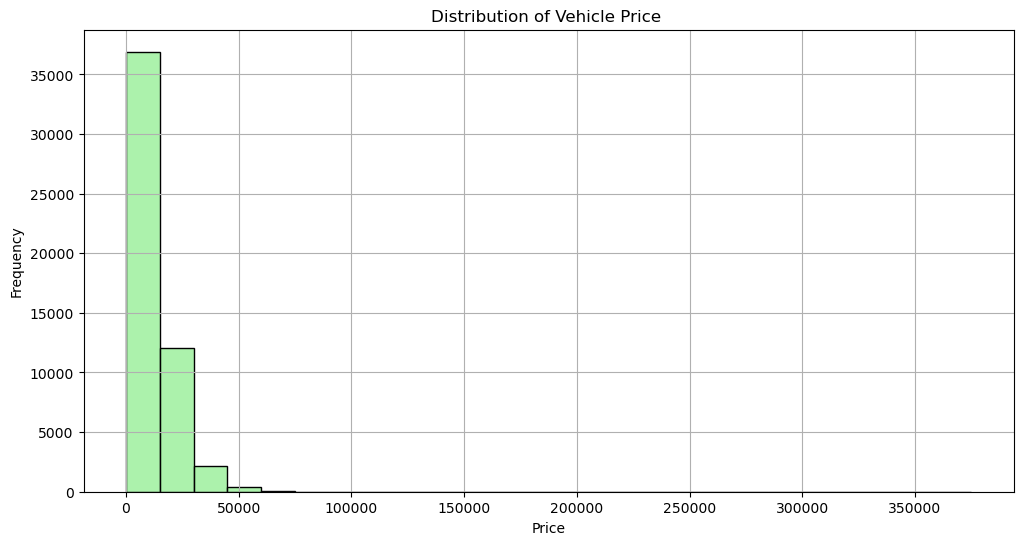

In [122]:
car_stats('price')

Vehicle - model_year:
Mean: 2009.75046966977
Variance: 39.46433805306638
Standard Deviation: 6.282064792173539


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



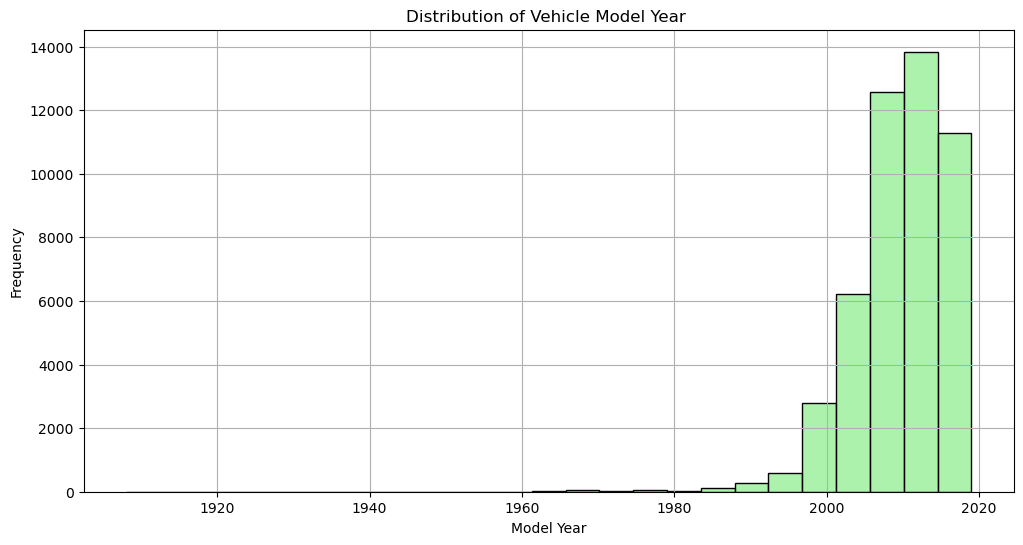

In [123]:
car_stats('model_year')

Vehicle - days_listed:
Mean: 39.55475982532751
Variance: 795.480838932406
Standard Deviation: 28.204269870578212


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



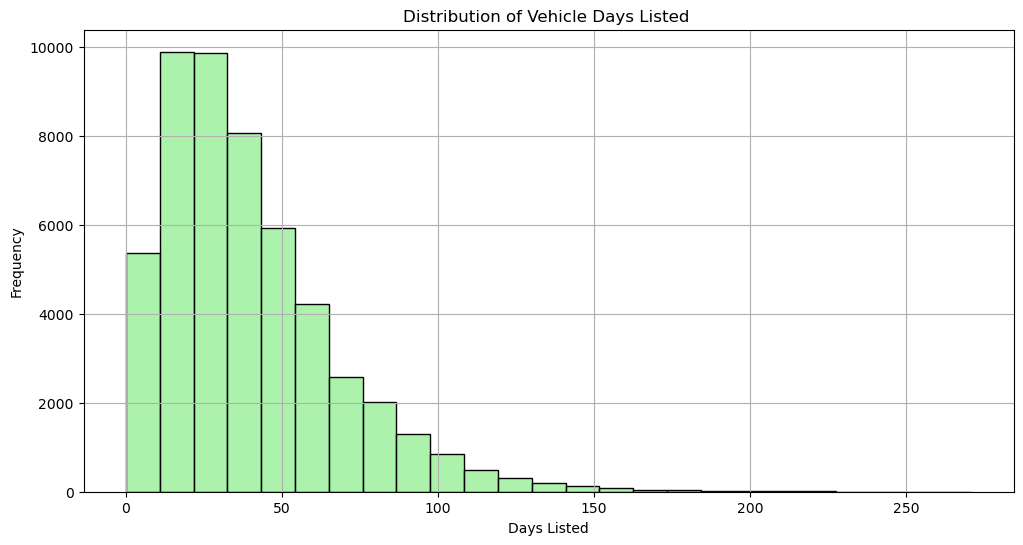

In [124]:
car_stats('days_listed')

***Create a streamlit graph that has two drop downs and like a pivot table will show the distribution, stdv, mean, and variance of the smaller data selection by selecting one column name and the second drop down is one of the unique manufactuerers***

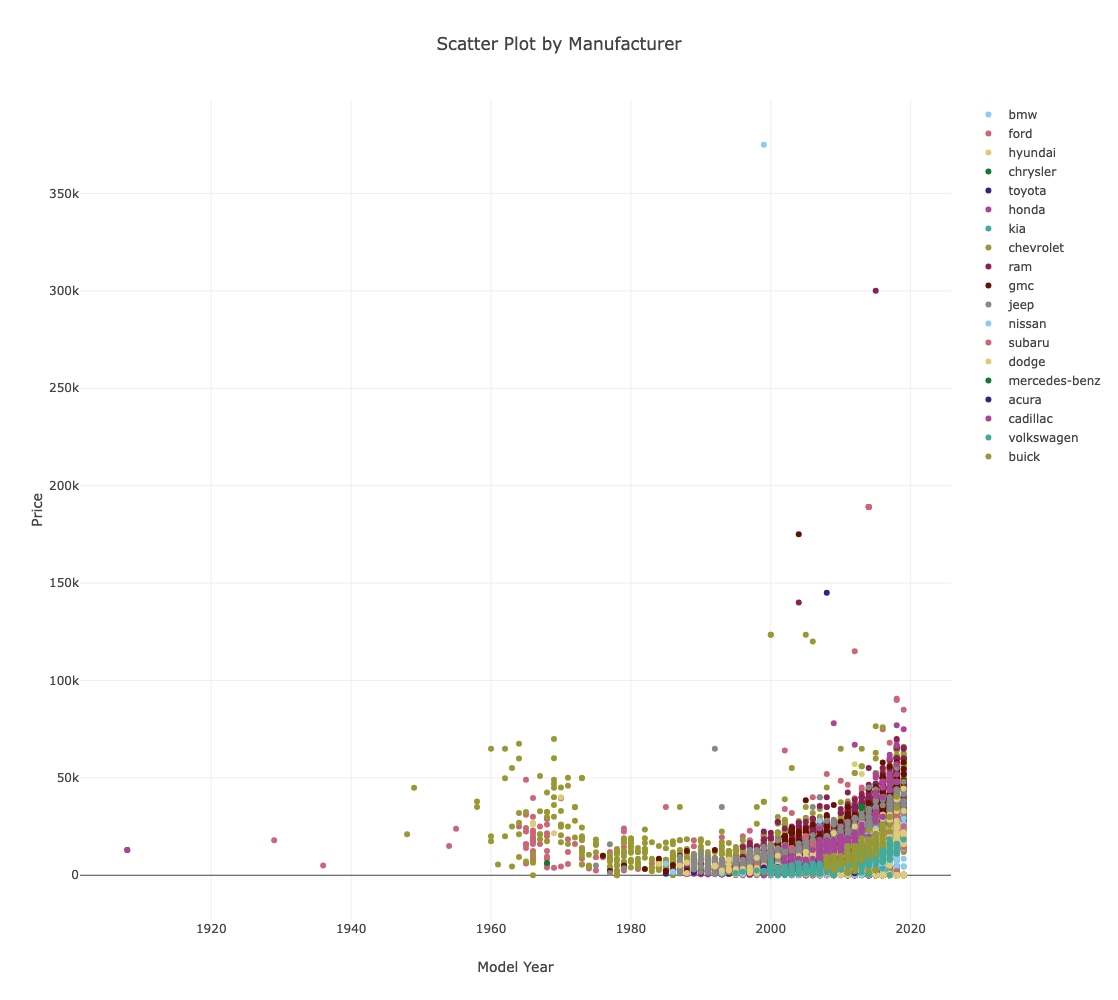

In [125]:
# Create an empty figure
fig = go.Figure()

# Define a color palette for manufacturers
colors = px.colors.qualitative.Safe

# Loop through each manufacturer and add a scatter trace to the figure
manufacturers = cars_df['manufacturer'].unique()
for i, manufacturer in enumerate(manufacturers):
    df_filtered = cars_df[cars_df['manufacturer'] == manufacturer]
    fig.add_trace(go.Scatter(
        x=df_filtered['model_year'],
        y=df_filtered['price'],
        mode='markers',
        name=manufacturer,
        marker=dict(color=colors[i % len(colors)])  # Ensure distinct colors using modulo
    ))

# Add title and labels
fig.update_layout(
    title='Scatter Plot by Manufacturer',
    xaxis_title='Model Year',
    yaxis_title='Price',
    height=1000
)

# Show plot
fig.show()

***Create a scatter plot similar to this in streamlit and be able to select different manufacturers to add to the plot. In addition to being able to change the upper and lower range of price and model year with sliders.***

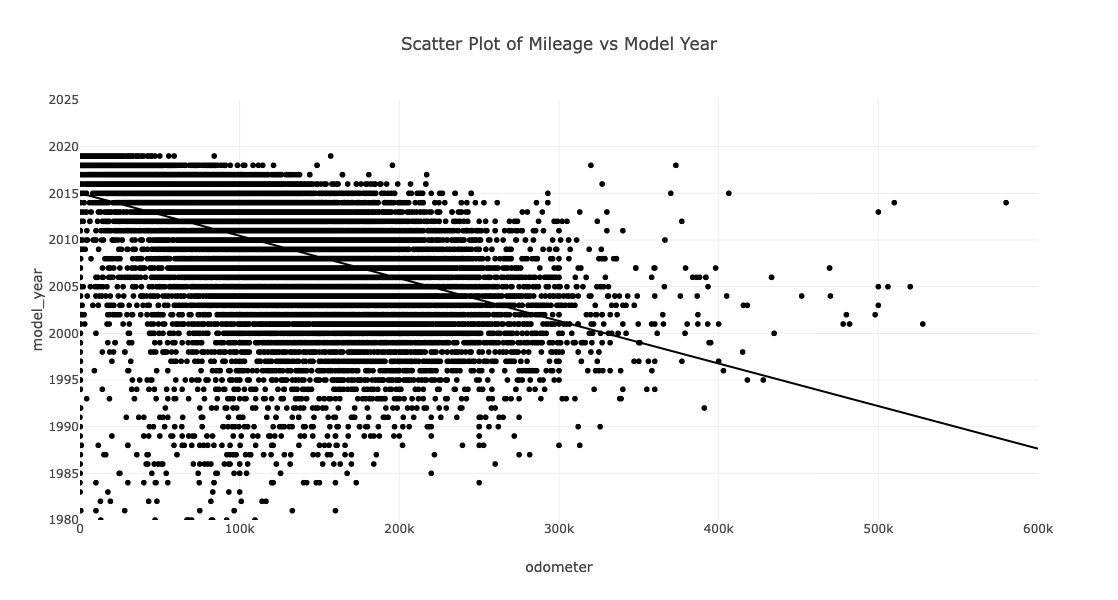

In [126]:
# Create a scatter plot
fig = px.scatter(cars_df, x='odometer', y='model_year', title='Scatter Plot of Mileage vs Model Year', trendline='ols')
fig.update_layout(
    height=600,
    xaxis=dict(range=[10, 600000]),  # Set the range of x-axis values
    yaxis=dict(range=[1980, 2025])  # Set the range of x-axis values
)
# Show plot
fig.show()

***Create this scatter plot with streamlit and be able to select manufactures to add to the chart. Additionally be able to use sliders to control upper and lower range of x and y axis. And check boxes to be able to select for the different conditions***

In [130]:
display(cars_df['condition'].unique())
cars_df.info()
cars_df.head(10)

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  manufacturer  51525 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 5.5+ MB


price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV         NaN     1.0  2018-06-23           19   
1    automatic  pickup       white     1.0  2018-10-19           50   
2    automatic   sedan         red     2.0  2019-02-07           79   
3    automatic  pickup         NaN     2.0  2019-03-22            9   
4    automatic   sedan       black     2.0  2019-04-02           28   
5    automatic   sedan       black     1.0  2018-06-20           15   
6    automatic   sedan       white     2.0  2018-12-27           73   
7    automatic     SUV       black     1.0  2019-01-07           68   
8    automatic     SUV         NaN     1.0  2018-07-16           19   
9    automatic     SUV        blue     1.0  2019-02-15           17   

  manufacturer  
0          bmw  
1         ford  
2      hyundai  
3         ford  
4     chrysler  
5     chrysler  
6       toyota  
7        honda  
8          kia  
9        honda

### Conclusion:

I'm ready to create my streamlit charts based on the data analysis that I did above. Now I need to code it in app.py